# Análise do Consumo Energético de uma Residência. Clusterização de Padrões  de Consumo de Energia Elétrica.

Analisando os diferentes perfis de consumo de energia elétrica para posterior clusterização visando a escolha de uma modalidade tarifária adequada e previsão de carga. Os dados foram amostrados a partir do log de consumo de uma residência a cada minuto durante um período de 4 anos.

Com a crescente automatização das residências e instalações elétricas, e o aumento da aplicação de IoT, é natural que se expanda a quantidade de dados disponíveis sobre características elétricas e consumo de energia. Este fator é de muita importância para a realização de melhorias e estudos focando no melhor aproveitamento, planejamento e comercialização da energia elétrica.

### Source: Individual household electric power consumption Data Set
https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption

## Dicionário dos Atributos

Date: Data no Formato dd/mm/yyyy.

Time: Horário no Formato hh:mm:ss.

Global_active_power: Consumo de Potência Ativa Média por minuto (kW).

Global_reactive_power: Consumo de Potência Reativa Média por minuto (kVAR).

Voltage: Tensão Média por minuto (V).

Global_intensity: Intensidade de Corrente Média por minuto (A).

Sub_metering_1: Consumo de Energia em (watt-hora) dos eletrodomésticos da cozinha.

Sub_metering_2: Consumo de Energia em (watt-hora) dos eletrodomésticos da lavanderia.

Sub_metering_3: Consumo de Energia em (watt-hora) do chuveiro e ar-condicionado.

## Metodologia

Neste projeto iremos realizar uma abstração. Os dados referem-se apenas ao consumo energético de uma residência durante um período de quatro anos, no entanto, iremos supor que esta casa foi habitada por diferentes famílias com diferentes padrões de consumo durante tal período de tempo, a fim de definí-los utilizando-se de clusterização através do algoritmo Kmeans. Além disso, iremos analisar a corrente, tensão e fator de potência ao longo do tempo. Também serão analisados os padrões de consumo dos diferentes subgrupos de eletrodomésticos descritos no dataset.

## Etapa 1: Manipulação dos Dados e Pré-Visualização

Podemos supor a existência de 3 tipos de consumidores residênciais de energia elétrica:

- Consumidor 1: o maior consumo é registrado na parte da manhã e fim de tarde, pois geralmente este trabalha/estuda durante o dia. Logo, durante a tarde e madrugada, o consumo tende a ser pequeno.

- Consumidor 2: apresenta um consumo regular durante todo o dia, podendo este ser um caso de homeoffice ou dono(a) de casa, ou trabalhador de turno noturno.

- Consumidor 3: consumo pequeno no geral, pois trabalha durante o dia e estuda a noite, ficando pouco tempo em casa.

Inicialmente iremos manipular os dados de forma a excluir valores faltantes e nulos, além de encontrar o consumo total e médio de energia por hora para cada uma das datas do dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
data = pd.read_csv("household_power_consumption.txt", sep=';')
data.head()

C:\Users\Rafael Pavan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
data['Log'] = pd.to_datetime(data['Date'] +' '+ data['Time'])
data = data.drop(['Date', 'Time'], axis=1)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Log
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [4]:
data=data.set_index('Log')
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Log,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
data.isnull().values.any()

True

In [6]:
data.isna().values.any()

True

In [7]:
data = data.replace('?', np.nan)
data = data.astype(np.float).fillna(method='bfill')

In [8]:
dataperhour = data.resample('H').mean()
dataperhour['hour'] = dataperhour.index.hour
dataperhour.index = dataperhour.index.date
dataperhour.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour
2006-12-16,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,17
2006-12-16,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667,18
2006-12-16,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333,19
2006-12-16,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333,20
2006-12-16,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,21


In [9]:
consumperhour = dataperhour.pivot(columns='hour') 
consumperhour.head()

Global_active_power                                          \
hour                        0         1         2         3         4    
2006-12-16                 NaN       NaN       NaN       NaN       NaN   
2006-12-17            1.882467  3.349400  1.587267  1.662200  2.215767   
2006-12-18            0.276367  0.313300  0.284467  0.309933  1.026333   
2006-12-19            0.837133  0.353033  0.327233  0.308300  0.327833   
2006-12-20            0.459833  0.258667  0.784367  0.310033  0.289000   

                                                              ...  \
hour              5         6         7         8         9   ...   
2006-12-16       NaN       NaN       NaN       NaN       NaN  ...   
2006-12-17  1.996733  1.303300  1.620033  1.890567  2.549067  ...   
2006-12-18  0.293500  0.610000  2.450433  2.082133  1.629333  ...   
2006-12-19  0.306667  0.796333  1.785633  3.879033  1.617767  ...   
2006-12-20  0.262700  0.283600  1.526633  2.917600  1.385533  ...   

           Sub_metering_3                                              \
hour                   14         15         16         17         18   
2006-12-16            NaN        NaN        NaN  16.861111  16.866667   
2006-12-17      18.233333  17.700000  17.166667  16.816667  16.833333   
2006-12-18      17.383333  17.983333  17.983333  17.450000  16.916667   
2006-12-19       0.000000   2.216667  18.033333  17.433333  17.300000   
2006-12-20      16.583333   0.000000   0.000000   0.000000  10.516667   

                                                                   
hour               19         20         21         22         23  
2006-12-16  16.683333  16.783333  17.216667   4.433333   0.000000  
2006-12-17  16.683333  17.116667  17.500000   2.500000   0.000000  
2006-12-18   0.000000  13.250000   3.716667   0.000000   0.000000  
2006-12-19  11.650000   0.000000   0.000000   0.000000   0.000000  
2006-12-20  17.183333  17.116667  17.066667  17.483333  17.983333  

[5 rows x 168 columns]

In [10]:
consumperhour.isna().values.any()

True

In [11]:
consumperhour = consumperhour.dropna()
consumperhour.head()

Global_active_power                                          \
hour                        0         1         2         3         4    
2006-12-17            1.882467  3.349400  1.587267  1.662200  2.215767   
2006-12-18            0.276367  0.313300  0.284467  0.309933  1.026333   
2006-12-19            0.837133  0.353033  0.327233  0.308300  0.327833   
2006-12-20            0.459833  0.258667  0.784367  0.310033  0.289000   
2006-12-21            1.535867  1.397967  1.274900  0.302600  0.246733   

                                                              ...  \
hour              5         6         7         8         9   ...   
2006-12-17  1.996733  1.303300  1.620033  1.890567  2.549067  ...   
2006-12-18  0.293500  0.610000  2.450433  2.082133  1.629333  ...   
2006-12-19  0.306667  0.796333  1.785633  3.879033  1.617767  ...   
2006-12-20  0.262700  0.283600  1.526633  2.917600  1.385533  ...   
2006-12-21  0.290700  0.295667  1.280467  1.563033  2.575800  ...   

           Sub_metering_3                                              \
hour                   14         15         16         17         18   
2006-12-17      18.233333  17.700000  17.166667  16.816667  16.833333   
2006-12-18      17.383333  17.983333  17.983333  17.450000  16.916667   
2006-12-19       0.000000   2.216667  18.033333  17.433333  17.300000   
2006-12-20      16.583333   0.000000   0.000000   0.000000  10.516667   
2006-12-21       8.333333   0.000000  17.283333  11.983333  16.766667   

                                                                   
hour               19         20         21         22         23  
2006-12-17  16.683333  17.116667  17.500000   2.500000   0.000000  
2006-12-18   0.000000  13.250000   3.716667   0.000000   0.000000  
2006-12-19  11.650000   0.000000   0.000000   0.000000   0.000000  
2006-12-20  17.183333  17.116667  17.066667  17.483333  17.983333  
2006-12-21  11.700000   4.283333   8.583333   0.000000   0.000000  

[5 rows x 168 columns]

In [12]:
cph = consumperhour['Global_active_power']
cph.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
2006-12-17,1.882467,3.349400,1.587267,1.662200,2.215767,1.996733,1.303300,1.620033,1.890567,2.549067,...,2.092633,2.985400,3.326033,3.406767,3.697100,2.908400,3.361500,3.040767,1.518000,0.437733
2006-12-18,0.276367,0.313300,0.284467,0.309933,1.026333,0.293500,0.610000,2.450433,2.082133,1.629333,...,1.733033,1.784300,1.949300,2.154900,2.402533,2.614500,3.050567,2.169733,1.738800,1.547267
2006-12-19,0.837133,0.353033,0.327233,0.308300,0.327833,0.306667,0.796333,1.785633,3.879033,1.617767,...,0.302133,0.421367,1.372133,2.111500,2.204700,1.842100,2.940533,1.442867,0.720000,0.383700
2006-12-20,0.459833,0.258667,0.784367,0.310033,0.289000,0.262700,0.283600,1.526633,2.917600,1.385533,...,1.294900,0.281133,0.468433,0.573500,2.836833,3.248633,3.575467,3.646067,3.058967,2.381767
2006-12-21,1.535867,1.397967,1.274900,0.302600,0.246733,0.290700,0.295667,1.280467,1.563033,2.575800,...,1.023900,0.307400,1.360067,1.752633,2.443300,2.197133,2.437367,0.982267,0.280267,0.270433


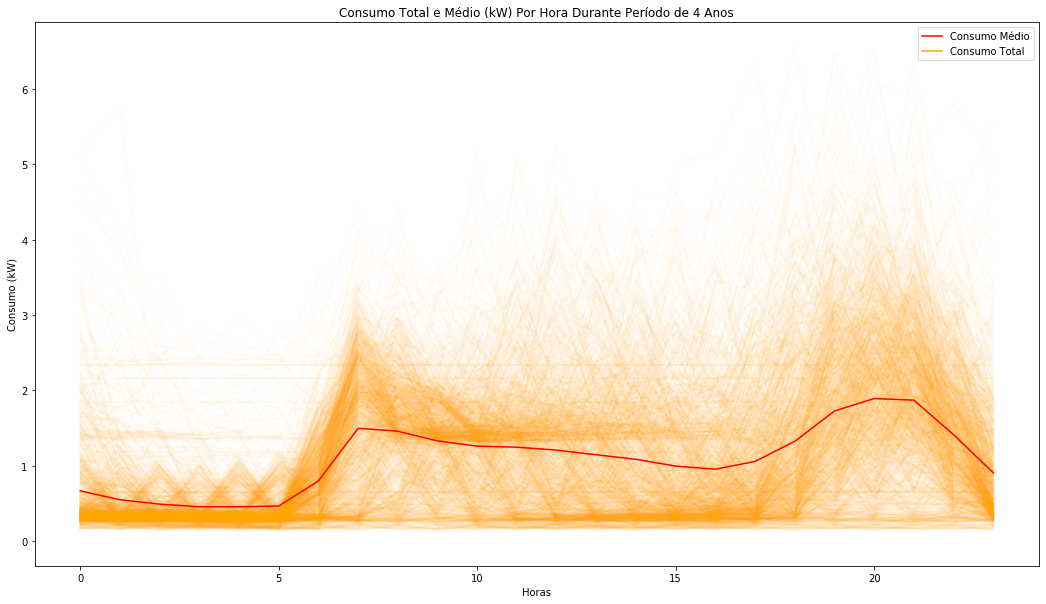

In [13]:
cphl = cph.to_numpy()

cphm = cph.mean()

cphlm = cphm.to_numpy()

fig, ax= plt.subplots(1,1, figsize=(18,10))

for i in range(cphl.shape[0]):
    plt.plot(cphl[i,:], color='orange', alpha=0.03)

plt.plot(cphlm, color='red', alpha=1, label='Consumo Médio')
plt.plot(0, color='orange', alpha=1, label='Consumo Total')

plt.xlabel('Horas')  
plt.ylabel('Consumo (kW)')
plt.title('Consumo Total e Médio (kW) Por Hora Durante Período de 4 Anos')
plt.legend()
plt.show()


Conforme gráfico acima, podemos analisar a curva de demanda média em cada horário do dia para uma residência.

## Etapa 2: Clusterização

Vamos encontrar os possíveis clusters existentes. Para isso, utilizaremos o algoritmo KMeans da biblioteca sklearn.

O agrupamento é uma técnica de aprendizagem não supervisionada. O algoritmo aprenderá qual é a relação entre os dados por meio de uma métrica específica que indica quando determinado registro pertence a um grupo ou outro.


In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import math

In [16]:
x = consumperhour.values.copy()

Para utilizar o algoritmo KMeans, é necessário transformar os dados para um range padrão de escala. Para isso, utilizaremos o MinMaxScaler.

In [17]:
escalonamento = MinMaxScaler()

X = escalonamento.fit_transform(x)

X

array([[0.34902577, 0.57084934, 0.4323931 , ..., 0.7       , 0.1       ,
        0.        ],
       [0.02958823, 0.03013375, 0.04543429, ..., 0.14866667, 0.        ,
        0.        ],
       [0.14111922, 0.03721008, 0.05813689, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.35575489, 0.28825342, 0.63639694, ..., 0.35866667, 0.06133333,
        0.06533333],
       [0.05309042, 0.04515313, 0.10013564, ..., 0.20466667, 0.10933333,
        0.026     ],
       [0.14984387, 0.02193542, 0.06508718, ..., 0.        , 0.        ,
        0.        ]])

Vamos avaliar qual o melhor número de clusters a partir do Método "Silhouette Value".

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters. The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance. 

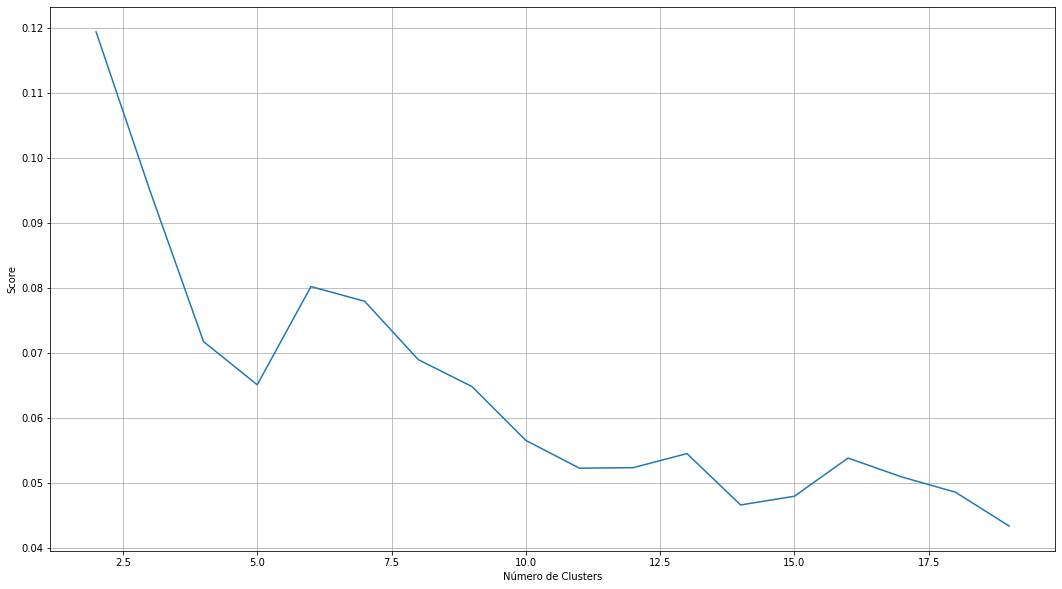

In [45]:
fig, ax= plt.subplots(1,1, figsize=(18,10))

score=[]
lista = np.arange(2,20).astype(int)    

for nclusters in lista:
     
        kmeans = KMeans(n_clusters=nclusters)
        previsoes = kmeans.fit_predict(X)
        kmeans.fit(X)
        score.append(silhouette_score(X, kmeans.labels_))


plt.plot(lista, score)
plt.grid()
plt.xlabel('Número de Clusters')  
plt.ylabel('Score')
plt.show()


Pelo Método Silhouette, vemos que a melhor opção de clusters para o conjunto é de 2. No entanto, utilizaremos 3 para nossa análise.

In [26]:
kmeans = KMeans(n_clusters=3)
previsoes = kmeans.fit_predict(X)
consumperhour['previsoes']=previsoes
consumperhour['previsoes'].head()

2006-12-17    2
2006-12-18    2
2006-12-19    0
2006-12-20    1
2006-12-21    2
Name: previsoes, dtype: int32

In [27]:
cluster0 = consumperhour[consumperhour['previsoes']==0]
cluster1 = consumperhour[consumperhour['previsoes']==1]
cluster2 = consumperhour[consumperhour['previsoes']==2]


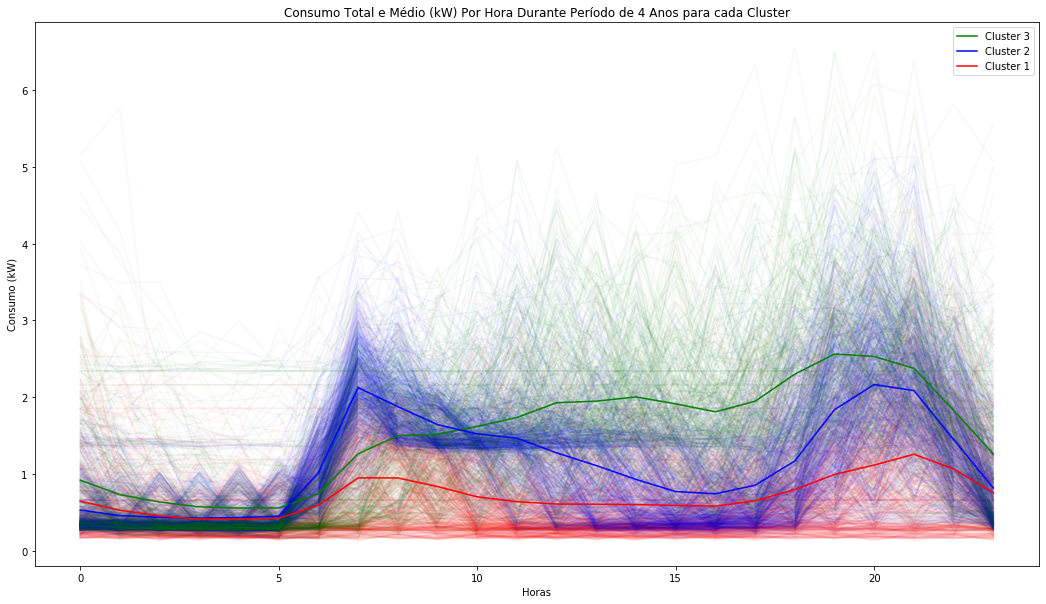

In [41]:
cluster0l = cluster0['Global_active_power'].to_numpy()
cluster0lm = cluster0['Global_active_power'].mean().to_numpy()
cluster1l = cluster1['Global_active_power'].to_numpy()
cluster1lm = cluster1['Global_active_power'].mean().to_numpy()
cluster2l = cluster2['Global_active_power'].to_numpy()
cluster2lm = cluster2['Global_active_power'].mean().to_numpy()


fig, ax= plt.subplots(1,1, figsize=(18,10))

for i in range(cluster0l.shape[0]):
    plt.plot(cluster0l[i,:], color='red', alpha=0.04)

for i in range(cluster1l.shape[0]):
    plt.plot(cluster1l[i,:], color='blue', alpha=0.04)

for i in range(cluster2l.shape[0]):
    plt.plot(cluster2l[i,:], color='green', alpha=0.04)
    

plt.plot(cluster2lm, color='green', alpha=1, label='Cluster 3')
plt.plot(cluster1lm, color='blue', alpha=1, label='Cluster 2')
plt.plot(cluster0lm, color='red', alpha=1, label='Cluster 1')

plt.xlabel('Horas')  
plt.ylabel('Consumo (kW)')
plt.title('Consumo Total e Médio (kW) Por Hora Durante Período de 4 Anos para cada Cluster')
plt.legend()
plt.show()

Podemos dividir os clusters da seguinte maneira:
    
    

### - Grupo Verde: Consumidor 1 - o maior consumo é registrado na parte da manhã e fim de tarde, pois geralmente este trabalha/estuda durante o dia. Logo, durante a tarde e madrugada, o consumo tende a ser pequeno.


### - Grupo Vermelho: Consumidor 2 - apresenta um consumo regular durante todo o dia, com baixa oscilação, podendo este ser um caso de homeoffice ou dono(a) de casa.


### - Grupo Azul: Consumidor 3 - consumo pequeno no geral, pois trabalha durante o dia e estuda a noite, ficando pouco tempo em casa.

A vantagem da identificação dos diferentes grupos é a de que pode-se adequá-los às tarifas de energia elétrica existentes, de maneira que resultem no melhor custo benefício ao consumidor.   


## Etapa 3: Análise do Consumo de Energia de Diferentes Grupos de Eletrodomésticos

In [29]:
sm1 = consumperhour['Sub_metering_1']
sm2 = consumperhour['Sub_metering_2']
sm3 = consumperhour['Sub_metering_3']

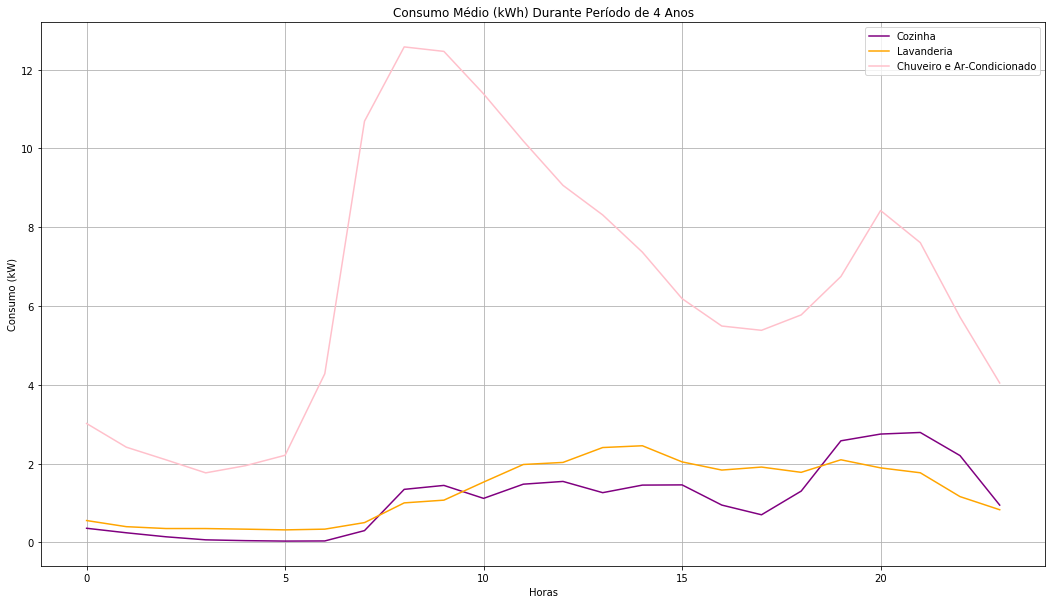

In [39]:
sm1l = sm1.mean().to_numpy()
sm2l = sm2.mean().to_numpy()
sm3l = sm3.mean().to_numpy()

fig, ax= plt.subplots(1,1, figsize=(18,10))

plt.plot(sm1l, color='purple', alpha=1, label='Cozinha')
plt.plot(sm2l, color='orange', alpha=1, label='Lavanderia')
plt.plot(sm3l, color='pink', alpha=1, label='Chuveiro e Ar-Condicionado')


plt.xlabel('Horas')  
plt.ylabel('Consumo (kW)')
plt.title('Consumo Médio (kWh) Durante Período de 4 Anos')
plt.legend()
plt.grid()
plt.show()

Podemos notar que o consumo de chuveiro e ar-condicionado tende a ser maior no horário próximo às 8h00 da manhã e 8h00 da noite. A cozinha, apresenta um pico no horário das 8h00 da noite, e no início da manhã. Já a lavanderia, atinge seu pico por volta das 14h00 da tarde.

## Etapa 4: Análise da Corrente, Tensão e Fator de Potência

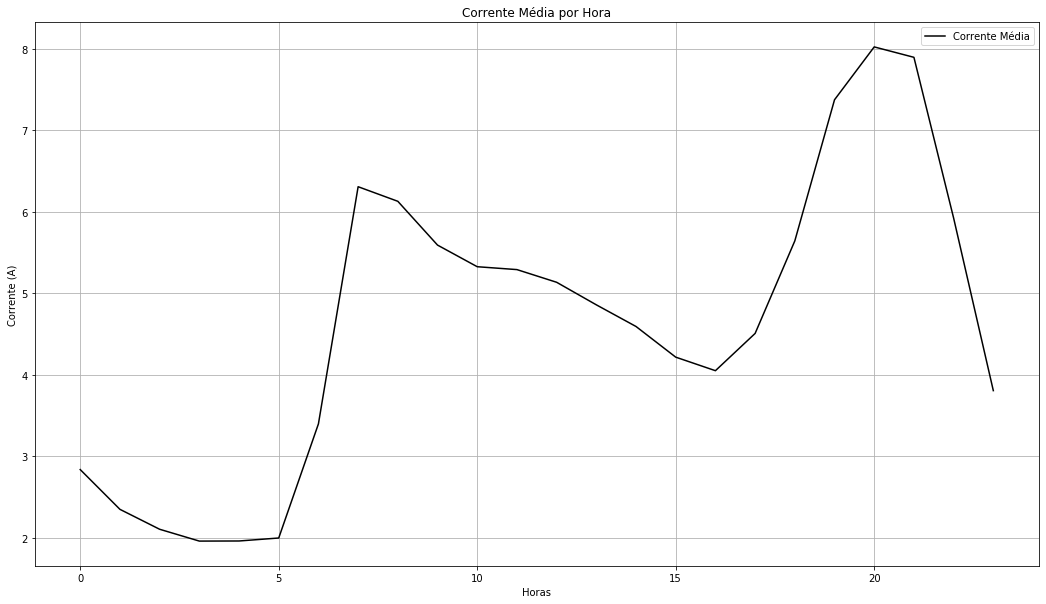

In [38]:
fig, ax= plt.subplots(1,1, figsize=(18,10))
correntem = consumperhour['Global_intensity'].mean().to_numpy()
plt.plot(correntem, color='black', alpha=1, label='Corrente Média')
plt.xlabel('Horas')  
plt.ylabel('Corrente (A)')
plt.title('Corrente Média por Hora')
plt.legend()
plt.grid()
plt.show()

Compare este gráfico com esta imagem: https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRxVECQJmG2YRovCXJxC3QU8Ez0bjnwJ21wBg&usqp=CAU

Podemos notar a presença de dois picos de corrente, consequentemente de consumo de energia elétrica. Um na parte da manhã, quando as pessoas começam seus dias, e outro na parte da tarde, quando geralmente estão voltando para casa e realizam tarefas domésticas: cozinham, tomam banho, etc...

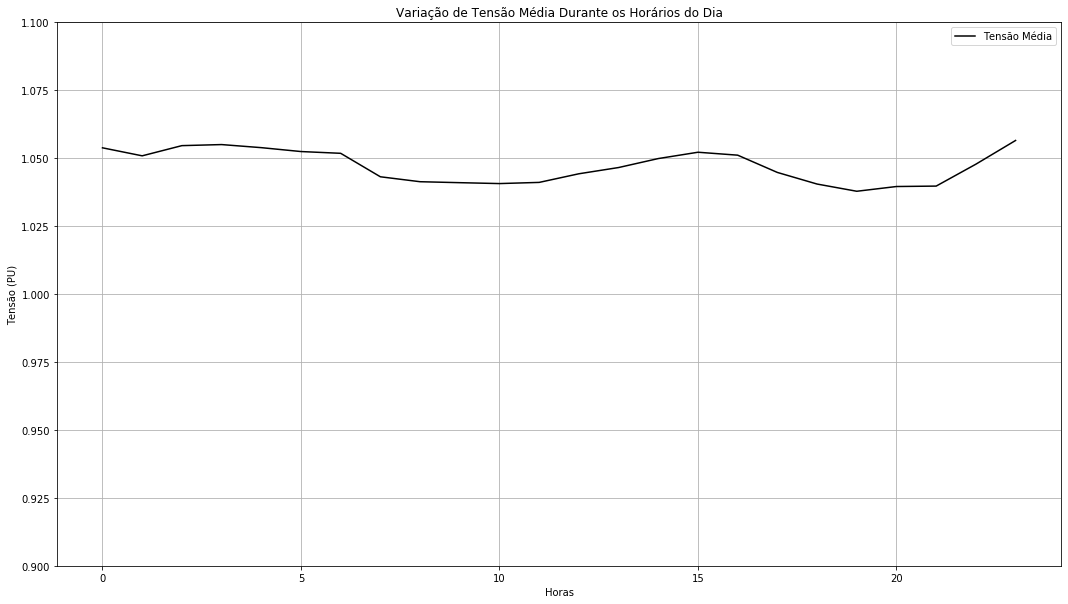

In [37]:
fig, ax= plt.subplots(1,1, figsize=(18,10))
voltage = consumperhour['Voltage'].mean().to_numpy()
plt.plot(voltage/230, color='black', alpha=1, label='Tensão Média')

plt.xlabel('Horas')  
plt.ylabel('Tensão (PU)')
plt.title('Variação de Tensão Média Durante os Horários do Dia')
plt.legend()
plt.ylim((0.9,1.1))
plt.grid()
plt.show()

Neste gráfico podemos observar que a variação de tensão, expressa em PU (valor base de 230 VRMS, França - Origem dos Dados), tende a ser maior nos picos de corrente (carga). Quando na presença dos picos de carga, seu valor tende a diminuir. Pode-se notar que até às 5 da manhã seu valor permanece acima de 5% em relação ao nominal. No caso em específico da fonte dos dados, a tensão sempre esteve acima de seu valor nominal, variando entre uma faixa de 2.5% a 6%.

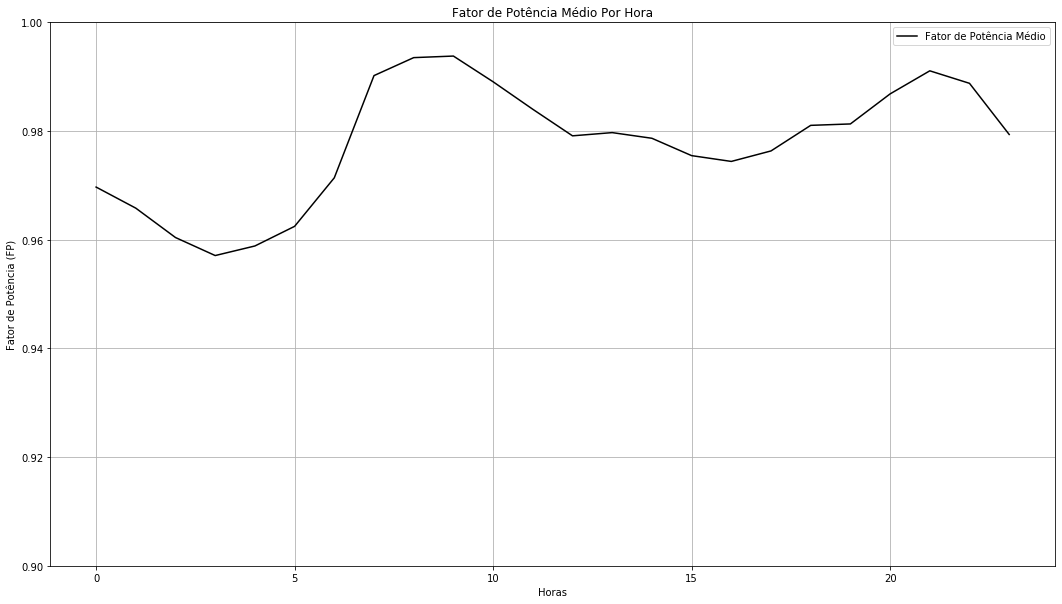

In [36]:
fig, ax= plt.subplots(1,1, figsize=(18,10))
kvam=voltage*correntem
fp = 1000*cphlm/kvam
plt.plot(fp, color='black', alpha=1, label='Fator de Potência Médio')

plt.xlabel('Horas')  
plt.ylabel('Fator de Potência (FP)')
plt.title('Fator de Potência Médio Por Hora')
plt.legend()
plt.ylim((0.9,1))
plt.grid()
plt.show()

Podemos observar que o fator de potência sempre permanece em um valor alto (>0,92), o que era de se esperar pois estamos analisando um consumo residencial pobre de cargas de características indutivas. É interessante notar que nos períodos de menor consumo de potência ativa (das 0h00 às 5h00), o fator de potência tende a alcançar seu menor valor. Tal fato pode ser decorrente de que os aparelhos indutivos, tais como transformadores, estejam operando com pouca carga e consequentemente piorando seu desempenho.

## Sugestão de Melhorias

Para uma melhor e mais fiel análise, poder-se-ia considerar a diferenciação entre fins de semana, dias úteis e feriados. Tal sugestão fica para uma próxima abordagem.